In [226]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
from IPython.display import Math
from collections import defaultdict
%matplotlib inline

## Экспоненциальное распределение

https://ru.wikipedia.org/wiki/Экспоненциальное_распределение

#### Ссылка на документацию scipy:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

#### Сделаем лямбду равной 0.2

In [262]:
lmbda = 0.2

#### Математическое ожидание высчитывается:

In [71]:
Math(r'E[M] = \frac{1}{\lambda}')

<IPython.core.display.Math object>

##### Дисперсия:

In [72]:
Math(r'E[M] = \frac{1}{\lambda^2}')

<IPython.core.display.Math object>

In [263]:
var = 1 / lmbda**2
mean = 1 / lmbda
std = math.sqrt(var)

In [264]:
print(f'Дисперсия: {var} \nСреднее: {mean} \nСтандартное отклонение: {std}')

Дисперсия: 24.999999999999996 
Среднее: 5.0 
Стандартное отклонение: 5.0


Выборка обьемом 1000:

In [265]:
exp_rv = sts.expon(scale=1./lmbda)
sample = exp_rv.rvs(1000)

### График гистограммы и теоретической плотности распределения

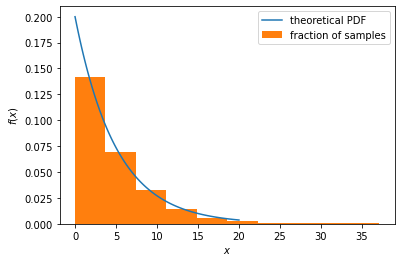

In [268]:
x = np.linspace(0,20,100)
pdf = exp_rv.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')

plt.hist(sample, density=True, label='fraction of samples')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

### Графики теоретической плотности нормального распределения и гистограммы выборочных средних при различных n:

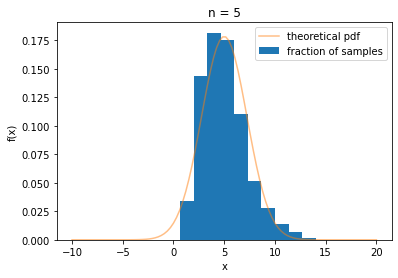

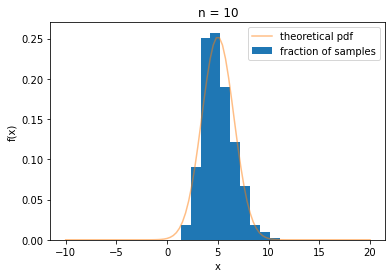

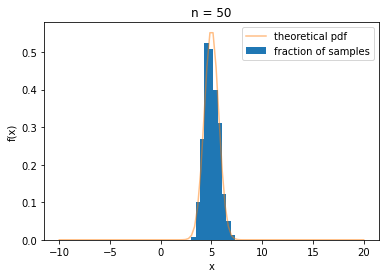

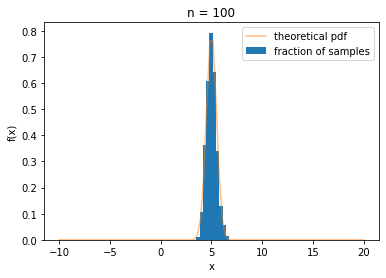

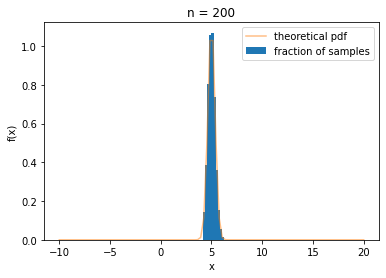

In [267]:
samples = defaultdict(list)
for n in [5, 10, 50, 100, 200]:
    for i in range(1000):
        samples[n].append(exp_rv.rvs(n).mean())
    norm_rv = sts.norm(mean, std/math.sqrt(n))
    x_ = np.linspace(mean - 3*std, mean + 3*std,100)
    pdf_norm = norm_rv.pdf(x_)
    plt.hist(samples[n], density=True, label='fraction of samples')
    plt.plot(x_, pdf_norm, label='theoretical pdf', alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.title(f'n = {n}')
    plt.show()

### Вывод:

С увеличением количества выборки (n) точность аппроксимации увеличивается, график сужается ближе к центру - его среднему.